In [89]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from Bio import SeqIO
import matplotlib.pyplot as plt
import umap
import seaborn as sns

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ------------------- -------------------- 41.0/85.7 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.7 MB 9.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 22.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 24.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.8 kB ? eta -:--:--
   ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -- ------------------------------------- 1.6/28.1 MB 52.5 MB/s eta 0:00:01
   -------- ------------------------------- 5.9/28.1 MB 53.4 MB/s et

In [46]:
## Code to test our script with known values
# df = pd.read_csv(r"C:\Users\JADVG3\Downloads\C3 plant_data.csv")
# print(df.shape)
# kcat_dropped = df.dropna(subset=['Kcat mean'], inplace=False)
# Sco_dropped = kcat_dropped.dropna(subset=['Sc/o\nmean'], inplace=False)
# print('Sco dropped shape:',Sco_dropped.shape)
# print('kcat dropped shape:',kcat_dropped.shape)
# print('df shape:',df.shape)
# target_kcat = Sco_dropped['Kcat mean']
# train_kcat = Sco_dropped.drop(columns=['Kcat mean', 'ProteinID', 'Fetched Data', 'Photosynthetic Type', 'Accession'])

# train_Sco = Sco_dropped.drop(columns=['Sc/o\nmean', 'ProteinID', 'Fetched Data', 'Photosynthetic Type', 'Accession'])
# target_Sco = Sco_dropped['Sc/o\nmean']

In [47]:
df = pd.read_csv(r"../Non-Mutated/Dependencies/merged_blind_protein_prott5.csv")
print(df.shape)
proteinId = df['ProteinID']
print(proteinId.shape)
embeddings = df.drop(columns=['ProteinID'])
print(embeddings.shape)

KeyboardInterrupt: 

In [ ]:
kcat = joblib.load(r"../Non-Mutated/Dependencies/ridgeModels/kcat mean 0.01.pkl")
sco = joblib.load(r"../Non-Mutated/Dependencies/ridgeModels/Sco mean 0.01.pkl")
kcat_predictions = kcat.predict(embeddings)
sco_predictions = sco.predict(embeddings)
kcat_predictions = pd.DataFrame(kcat_predictions, columns=['Kcat'])
sco_predictions = pd.DataFrame(sco_predictions, columns=['Sc/o'])
new_df = pd.concat([proteinId, kcat_predictions, sco_predictions], axis=1)
new_df.to_csv(r"../Non-Mutated/Output/predictions.tsv", sep='\t', index=False)

In [85]:

negative_kcats = new_df.loc[new_df['Kcat'] < 0]
negative_kcats = negative_kcats['ProteinID']
negative_kcats = np.array(negative_kcats)
negative_kcats = [string.replace(">", "") for string in negative_kcats]
print(negative_kcats[0])
print(len(negative_kcats))

aa_list = ['M', 'D', 'Q', 'S', 'G', 'R', 'Y', 'L', 'A', 'H', 'E', 'K', 'I', 'V', 'C', 'P', 'T', 'F', 'N', 'W', '*', 'X', 'B', 'Z', 'J']
# Specify the path to the FASTA file
fasta_file = r"../Non-Mutated/Dependencies/merged.fasta"
# Read the FASTA file
sequences = SeqIO.parse(fasta_file, "fasta")

neg_sequences = []
pos_sequences = []
neg_aa_dict = {aa: [] for aa in aa_list}  # Initialize neg_aa_dict with empty lists for all amino acids
pos_aa_dict = {aa: [] for aa in aa_list}  # Initialize pos_aa_dict with empty lists for all amino acids
# Iterate over the sequences
for sequence in sequences:
    # Access the sequence ID and sequence data
    sequence_desc = sequence.description
    sequence_data = sequence.seq
    if any(sequence.id in s for s in negative_kcats):
        neg_sequences.append(len(sequence_data))
        for aa in aa_list:
            num_aa = sequence_data.count(aa)
            percentage = num_aa / len(sequence_data)
            neg_aa_dict[aa].append(percentage)
        continue
    pos_sequences.append(len(sequence_data))
    for aa in aa_list:
        num_aa = sequence_data.count(aa)
        percentage = num_aa / len(sequence_data)
        pos_aa_dict[aa].append(percentage)
    # Do something with the sequence ID and sequence data


    

gi|223541024|gb|EEF42581.1| conserved hypothetical protein [Ricinus communis]
2776


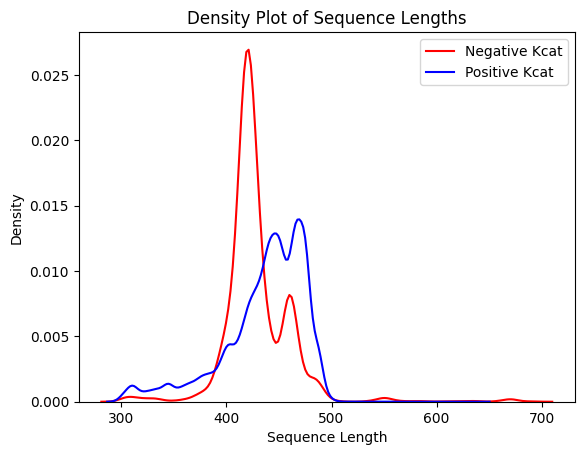

In [61]:

# Create a density plot
sns.kdeplot(data=neg_sequences, color="red", label="Negative Kcat")
sns.kdeplot(data=pos_sequences, color="blue", label="Positive Kcat")

# Set plot title and labels
plt.legend()
plt.title("Density Plot of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Density")

# Display the plot
4plt.show()

In [83]:

# Assuming you have two dictionaries: pos_dict and neg_dict

# Plotting density plots for positive dictionary
plt.figure(figsize=(10, 6))
for key, values in pos_aa_dict.items():
    sns.kdeplot(values, label=f'{key} positive',color='blue')
    sns.kdeplot(neg_aa_dict[key], label=f'{key} negative', color='red')
    plt.xlabel('Values (%)')
    plt.ylabel('Density')
    plt.title(f'Density Plot - {key}')
    plt.legend()
    # plt.show()
    if key == '*':
        key = 'asterisk'
    plt.savefig(f"../Non-Mutated/plots/{key}_density_plot.png")  # Save the plot with the title name
    plt.close()  # Close the plot to avoid displaying multiple plots in the same figure



C:\Users\JADVG3\AppData\Local\Temp\ipykernel_15832\4185966388.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(neg_aa_dict[key], label=f'{key} negative', color='red')
C:\Users\JADVG3\AppData\Local\Temp\ipykernel_15832\4185966388.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(neg_aa_dict[key], label=f'{key} negative', color='red')


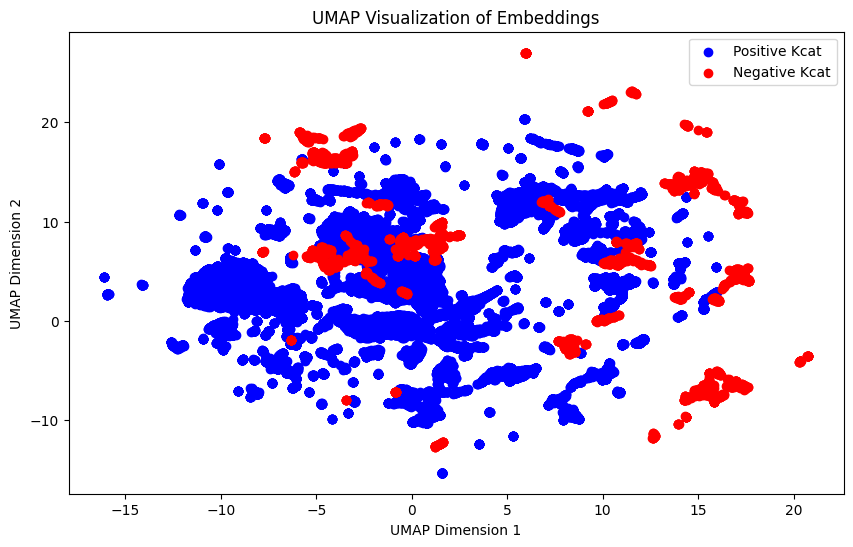

In [90]:
negative_kcat_indexes = new_df.loc[new_df['Kcat'] < 0].index
neg_embeddings = embeddings.loc[negative_kcat_indexes]
pos_embeddings = embeddings.loc[embeddings.index.difference(negative_kcat_indexes)]

umap_pos = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_pos.fit(pos_embeddings)

# Fit UMAP on the negative embeddings
umap_neg = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_neg.fit(neg_embeddings)

# Plot UMAP for positive embeddings
plt.figure(figsize=(10, 6))
plt.scatter(umap_pos.embedding_[:, 0], umap_pos.embedding_[:, 1], color='blue', label='Positive Kcat')
plt.scatter(umap_neg.embedding_[:, 0], umap_neg.embedding_[:, 1], color='red', label='Negative Kcat')
plt.title('UMAP Visualization of Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

(2776, 1024)


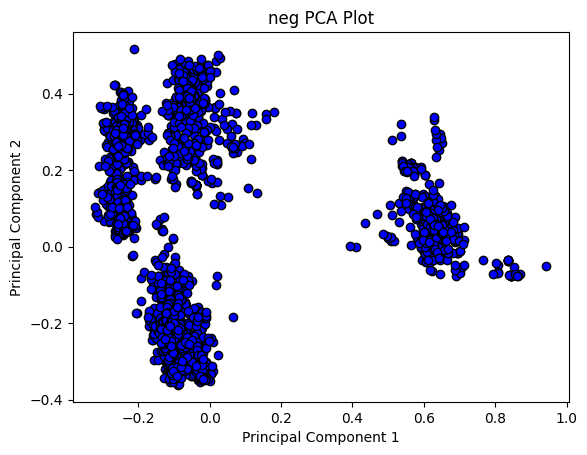

(53603, 1024)


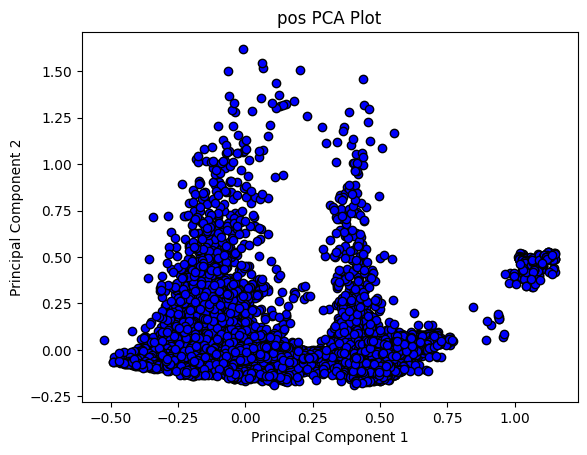

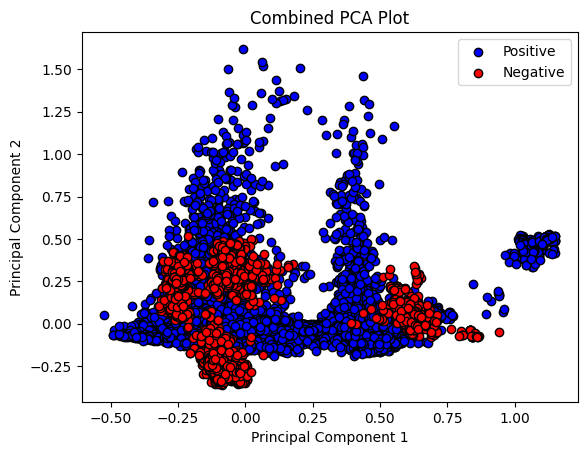

In [ ]:

def show_PCA_plot():
    """
    Displays PCA plots for positive and negative embeddings.

    This function applies PCA (Principal Component Analysis) to reduce the dimensionality of the data and then plots the data points in the reduced dimensional space.

    Parameters:
    None

    Returns:
    None
    """

    # Generate Plot for negative data points
    negative_kcat_indexes = new_df.loc[new_df['Kcat'] < 0].index
    neg_embeddings = embeddings.loc[negative_kcat_indexes]
    
    print(neg_embeddings.shape)
    
    # Apply PCA to reduce the dimensionality of the data])
    neg_embeddings = np.array(neg_embeddings)
    pca = PCA(n_components=2)  # You can adjust the number of components as needed
    data_reduced = pca.fit_transform(neg_embeddings)

    # Plot the data points in the reduced dimensional space
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c='blue', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('neg PCA Plot')
    plt.show()


    # Generate Plot for positive data points
    pos_embeddings = embeddings.loc[embeddings.index.difference(negative_kcat_indexes)]
    print(pos_embeddings.shape)

    # Apply PCA to reduce the dimensionality of the data])
    pos_embeddings = np.array(pos_embeddings)
    pca = PCA(n_components=2)  # You can adjust the number of components as needed
    data_reduced = pca.fit_transform(pos_embeddings)

    # Plot the data points in the reduced dimensional space
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c='blue', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('pos PCA Plot')
    plt.show()


    # Generate Plot for both the data points combined
    pca = PCA(n_components=2)  # You can adjust the number of components as needed
    data_reduced_pos = pca.fit_transform(pos_embeddings)
    data_reduced_neg = pca.fit_transform(neg_embeddings)

    # Plot the data points in the reduced dimensional space
    plt.scatter(data_reduced_pos[:, 0], data_reduced_pos[:, 1], c='blue', edgecolor='k', label='Positive')
    plt.scatter(data_reduced_neg[:, 0], data_reduced_neg[:, 1], c='red', edgecolor='k', label='Negative')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Combined PCA Plot')
    plt.legend()
    plt.show()

show_PCA_plot()